# Урок 2. Профилирование пользователей. Сегментация аудитории: unsupervised learning (clustering, LDA/ARTM), supervised (multi/binary classification)#

План занятия:

1. задача сегментации аудитории
2. тематическое моделирование - получаем эмбединги текстов
3. решаем задачу профилирования аудитории новостного портала

Рассматривать мы все будем в контексте решения конкретной прикладной задачи - задачи оттока

## Задача сегментации

<img src='https://drive.google.com/uc?export=view&id=1fH4dMvgSLT1u9nGc3DCxOI3YGJIkh5dj' width=600>

Разбиваем пользователей на группы, чем-то отличающиеся друг от друга.

Или же:

Сегментация клиентской базы — это способ повышения эффективности работы с пользователями путем их распределения по отдельным группам, или сегментам, в соответствии с их запросами и/или потребностями.

## Виды сегментации

### **1. когда совершил первую покупку (сколько прошло с момента регистрации до момента покупки)**

К примеру, есть сервис по заказу пиццы. Вначале пользователю нужно научиться пользоваться этим ПО, затем нужно сделать первый заказ, а затем пользователь может приходить всё реже и реже, а затем он нас покидает (из-за проблем в сервисе или из-за невкусной пиццы) - это нормальный живой цикл общения.

Это наблюдается в любой системе, где есть работа с клиентами.

Особенно, это известно маркетингу: сначала сотрудники помогают клиенту разобраться в продукте, затем они его поддерживают на пути пользования продуктом, а затем они общаются с ним, дабы клиент не ушел.


<img src='https://drive.google.com/uc?export=view&id=1wf6GFpfQNuxOGJ4xL0n4jb8hvVJjnTGF' width=600>

### **2. по психотипам**

Есть люди, которые делают покупки импульсивно, а есть те, которые всё тщательно обдумывают. И с ними нужно разговаривать по-разному.

<img src='https://drive.google.com/uc?export=view&id=1BRkfhmL1lwxOewbJvw46q8vZnPCAEqAp' width=600>

### **3. по платежам**

Интерес к покупателям, которые приходят к нам раз в год и платят по три копейки и к покупателям, которые приходят каждую неделю и оставляют по 100р, совершенно разный.

 <img src='https://drive.google.com/uc?export=view&id=1-ggaCJCNNV-XyFT2_tHfdjlmYefO85i4' width=800>

### **4. По эффективности взаимодействия (uplift)**

Актуально для телекома. 

Есть несколько групп клиентов:
1. Лояльные - совершают покупку и без нашего взаимодействия и с ним
2. Убеждаемые - совершат покупку только после нашего взаимодействия, без него не сделают покупку
3. Потерянные - не совершат покупку никогда, хоть мы им позвоним, хоть и не будем звонить
4. "не беспокоить" - совершат покупку, если мы их не будем тревожить, если потревожим, то потеряем покупателя.


<img src='https://drive.google.com/uc?export=view&id=1L0TJ8fK3YxuAzc52lz5SE2bgbwLBoS2J' width=500>

### **5. по интересам**

Пример: если человек искал, где купить десткое питание, то можем ему порекомендовать купить и памперсы.

<img src='https://drive.google.com/uc?export=view&id=1Ud1G7YC8eN8qxbCbidNhgd2e-EoEryfl' width=600>

Особенно выгодно профилировать пользователей по социальным сетям. Ведь любое действие и бездействие человека - это данные.
- Подписались на страницу
- Отписались от страницы
- Лайкнули новость
- Проигнорировали новость
- Добавили в избранное
- и т.д.

От этого контента зависят рекламные компании, которые настраиваются на определенную группу пользователей и на вас (а если точнее, не на вас самих, а на образ, который вы создаете в сети).

И еще куча вариантов сегментирования, которое может быть полезно. 

Для чего полезно?

1. понимание аудитории, способность описать основные группы пользователей и их интересы
2. выявление сегментов с максимальной монетизацией
3. выбор маркетинговой стратегии
4. налаживание эффективного взаимодействия с пользователями

## Пример (новостной портал)

Представим, что мы - компания-агрегатор новостей (новостной портал). И мы хотим построить модель прогнозирования оттока клиентов.

У нас есть:

1. читатели
2. новости

Для каждого пользователя мы можем за какой-то период (например, 1 день) достать из базы данных список прочитанных им новостей.

Для каждой новости мы можем вытащить текст и метаинформацию.


<img src='https://drive.google.com/uc?export=view&id=1OLrm1Rx9VjRVHbBW25Gi_mfUjY-WhB3p' width=700>

Нужно построить модель прогнозирования оттока. 


Нам нужны:

1. векторное представление пользователя
2. сегменты, описывающие интересы пользователя

p.s. в контексте нашей задачи - это одно и то же

Есть два очевидных варианта как это сделать:

1. многоклассовая классификация
    - **Проблема:**
    для классификации нам нужно сначала разметить новости - привлечение ручного труда
2. кластеризация документов с последующей попыткой их (кластера) интерпретировать

### Задача тематического моделирования (LDA)

LDA - Latent Dirichlet allocation

Терминология:

1. документ - коллекция слов 
2. тема - набор токенов (слов), совместно часто встречающихся в документах

- на свете бывают темы (заранее неизвестные), которые отражают то, о чём могут быть части документа;
- каждая тема – это распределение вероятностей на словах, т.е. мешок слов, из которого можно с разной вероятностью вытащить разные слова;

<img src='https://drive.google.com/uc?export=view&id=10hJ_zkUHDK1-hAYcdxUix5r9Wyaik9TA' width=500>


- каждый документ – это смесь тем, т.е. распределение вероятностей на темах, кубик, который можно кинуть *(тема искусства включает в себя не только слова балет и танцы, но и финансы, и кредиты)*; каждая тема в документе будет представлена в разных пропорциях (*если написал руководитель театра, то будет больше про танцы, а если написал министр культуры, то скорее про финансы, но везде говорим про искусство*)

<img src='https://drive.google.com/uc?export=view&id=1o7Bvl_2sscs3ldpxo4faqXCDIqTbkO8H' width=500>

- процесс порождения каждого слова состоит в том, чтобы сначала выбрать тему по распределению, соответствующему документу, а затем выбрать слово из распределения, соответствующего этой теме.

Предположим, что у нас есть несколько предложений:

1. I like to eat broccoli and bananas.
2. I ate a banana and spinach smoothie for breakfast.
3. Chinchillas and kittens are cute.
4. My sister adopted a kitten yesterday.
5. Look at this cute hamster munching on a piece of broccoli.

LDA - это метод для автоматического поиска тем, которые есть в предложениях. К примеру, если мы передадим эти предложения в модель и попросим найти 2 темы, то может получить что-то подобное:

- Предложения 1 и 2: 100% Topic A
- Предложения 3 и 4: 100% Topic B
- Предложение 5: 60% Topic A, 40% Topic B

<br>

- Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, … (уже сейчас можем понять, что topic A о еде)
- Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, … (topic B о милых животных)

Ну и конечно же вопрос, как LDA это делает?

Вероятностные модели удобно понимать и представлять в виде порождающих процессов (generative processes), когда мы последовательно описываем, как порождается одна единица данных, вводя по ходу дела все вероятностные предположения, которые мы в этой модели делаем. Соответственно, порождающий процесс для LDA должен последовательно описывать, как мы порождаем каждое слово каждого документа. И вот как это происходит:


0. Выбрать количество тем N
1. Случайно присвоить каждое слово в каждом документе к одной из N тем
    * *Заметьте, что это рандомное присвоение уже даёт распределение тем в документах и распределение слов во всех темах (но конечно не самого лучшего качества)*

2. Для каждого слова $w$ в документе $d$:
 * И для каждой темы $t$, посчитать две вероятности:
    * *предположить, что все присвоенные темы документы правильные за исключением одной, с которой работаем*
    1. $p(t|d)$ - Вероятность слов в документе, которые присвоены к теме
    2. $p(w|t)$ - Вероятность принадлежности слов из всех документов к теме $t$
 * Переопределить тему слова $w$, с помощью вероятности $p(t|d)*p(w|t)$ (опираясь на нашу модель, это вероятность того, что тема $t$ генерирует слово $w$)

3. В конечном счете достигнется стабильное состояние, когда присвоения имеют смысл.

Бросаем кубик, у которого столько сторон, сколько слов в словаре. Но определенные стороны кубика утяжеленные, то есть он будет чаще на них падать.

Например, если тема спорт, то слова "футбол", "вратарь", "мяч" будут попадаться гораздо чаще внутри этой темы.

<img src='https://drive.google.com/uc?export=view&id=1h4qc01naiyUZA0Q63bcv64ZnC2AKwbgp' width=600>

Таким образом, любой текст порождается из распределений, путем подбрасывания кубиков.

  ист. https://habr.com/ru/company/surfingbird/blog/230103/

1. условное распределение на множестве терминов, p(w|t). вероятность того, что слово w принадлежит теме t.
2. тематический профиль документа - условное распределение тем p(t|d). вероятность того, что тема t принадлежит документу d.
3. условное распределение слов в документах - p(w|d). вероятность, что слово w есть в документе d.


Тематическая модель позволяет нам получить p(w|t), p(t|d) по известным p(w|d)

<img src='https://drive.google.com/uc?export=view&id=1pd-ieIcQCF11xOwXbRt2v5Q1LRE2d1yV' width=600>

Когда начинаем решать задачу, то нам известно p(w|d). И нам не известно с какой вероятностью встречаются слова в темах и какие темы находятся в нашем документе и с какой вероятностью.
Есть проблема, что мы не знаем, какое количество тем есть в нашей задаче - это гиперпараметр.

### Переходим к практике


Вспомним, какие задачи перед нами стоят:
Основная - представление характеристик пользователя по списку статей, которые он читал.
1. Взять статьи и превратить их в темы.
2. Взять темы и превратить их в вектор, описывающий пользователя.


In [ ]:
import pandas as pd

Наши новости

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt 

--2022-03-23 16:41:49--  https://docs.google.com/uc?export=download&confirm=t&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR
Resolving docs.google.com (docs.google.com)... 64.233.189.101, 64.233.189.102, 64.233.189.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/camcukfkoo65ns31eiqif104nbh3vh75/1648053675000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download [following]
--2022-03-23 16:41:50--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/camcukfkoo65ns31eiqif104nbh3vh75/1648053675000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-

In [ ]:
news = pd.read_csv("articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [ ]:
news.iloc[0]['title']

'Заместитель председателяnправительства РФnСергейnИвановnизбран председателем советаnПБК ЦСКАn. Как сообщаетnпресс-службаnармейцев, такое решение было единогласно принято на первом заседании совета клуба. Основной функцией этого органа будет обсуждение текущего состояния, планирование и утверждение стратегии развития клуба на ближайшую перспективу.nnВ состав совета вошли:nГеоргий Полтавченкоn(полномочный представитель президента в Центральном федеральном округе),nАлексей Седовn(генерал-полковник, начальник службы по защите конституционного строя и борьбе с терроризмомnФСБ РФn),nАлександр Новакn(заместитель министра финансов РФ),nВячеслав Полтавцевn(заместитель генерального директора, руководитель блока по взаимодействию с органами власти, социальной и корпоративной политикиnГМК «Норильский никель»n),nЛеонид Исаковичn(генеральный директор ООО «УК «Спортивные проекты»),nОльга Плешаковаn(генеральный директорn«Трансаэро»n),nАлександр Провоторовn, (генеральный директорnОАО «Ростелеком»n), А

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

--2022-03-23 16:41:54--  https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a
Resolving drive.google.com (drive.google.com)... 142.251.8.100, 142.251.8.113, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h5eellup386ck2m53v4cf65trs9a4e6v/1648053675000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download [following]
--2022-03-23 16:41:55--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h5eellup386ck2m53v4cf65trs9a4e6v/1648053675000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.goog

Загрузим пользователей и списки последних прочитанных новостей

In [ ]:
users = pd.read_csv("users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

**ПОЗАВТРАКАЛИ**

Стемминг (убираем лишнии куски слова):
**завтрак**<br>
Очень быстро, очень дешево и очень слабо.

Лемматизация (перевод в неопределенную форму для гл. и в им.падеж для сущ.):
**завтракать**<br>
Небыстро, сложно.

In [ ]:
!pip install razdel pymorphy2 pyLDAvis

     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 8.2 MB 46.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6ed5bf7eebd6273a9bb53f896c370de06f686218b4307336819d1905e899aba5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

Не все слова равны, не все слова одинаково работают. К примеру, союзы и предлоги в нашей задачи никак не помогут, поэтому можем их выкидывать. (*Но в задачах оценки стиля, к примеру, такие слова будут очень полезны*)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_ru = stopwords.words('russian')
print(len(stopword_ru))

151


In [ ]:
stopword_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

--2022-03-23 16:42:33--  https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c
Resolving drive.google.com (drive.google.com)... 142.251.8.139, 142.251.8.100, 142.251.8.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5paqd7ef2kflvpvepdekg6b4k209opbt/1648053750000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download [following]
--2022-03-23 16:42:34--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5paqd7ef2kflvpvepdekg6b4k209opbt/1648053750000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.goog

In [ ]:
with open('stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [ ]:
stopword_ru[200:210]

['ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам']

In [ ]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):    
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [ ]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('сбегали')[0].normal_form

'сбегать'

In [ ]:
news['title'].iloc[:2].apply(lambda x: clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Possible nested set at position 39
  


0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [ ]:
%%time
from tqdm import tqdm
tqdm.pandas()

# Запускаем очистку текста. Будет долго...
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

100%|██████████| 27000/27000 [00:46<00:00, 585.40it/s] 

CPU times: user 35.4 s, sys: 1.79 s, total: 37.2 s
Wall time: 46.2 s


In [ ]:
news['title'].iloc[:10]

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
2    форвард авангарда томаш заборский прокомментир...
3    главный тренер кубани юрий красножан прокоммен...
4    решением попечительского совета владивостокско...
5    ио главного тренера вячеслав буцаев прокоммент...
6    запорожский металлург дома потерпел разгромное...
7    сборная сша одержала победу над австрией со сч...
8    бывший защитник сборной россии дарюс каспарайт...
9    полузащитник цска зоран тошич после победы над...
Name: title, dtype: object

In [ ]:
news['title'].iloc[:2].apply(lambda x: lemmatization(x))

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
Name: title, dtype: object

In [ ]:
%%time
# Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|██████████| 27000/27000 [04:42<00:00, 95.72it/s] 

CPU times: user 4min 37s, sys: 2.15 s, total: 4min 40s
Wall time: 4min 42s


А теперь в 3 строчки обучим нашу модель

In [ ]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [ ]:
len(common_dictionary)

135645

In [ ]:
common_dictionary[4]

'банк'

In [ ]:
# common_dictionary.id2token

In [ ]:
common_dictionary.doc2bow(['коллега', 'пошел', 'пить', 'чай'], allow_update=True)

[(993, 1), (6129, 1), (12270, 1), (135645, 1)]

Все просто - это словарь наших слов

Запускаем обучение

In [ ]:
N_topic = 20

In [ ]:
%%time
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

CPU times: user 49.4 s, sys: 23.5 s, total: 1min 12s
Wall time: 47.1 s


In [ ]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [ ]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [ ]:
# Создаем новый корпус документов, которые раньше не видели
other_texts = list(news['title'].iloc[:3])
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(3, 0.24989054), (13, 0.046500523), (14, 0.37024564), (19, 0.31336325)]

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [ ]:
x = lda.show_topics(num_topics=N_topic, num_words=7, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: самолёт система корабль часть нефть российский полёт
topic_1: украина мозг украинский снижение рост российский киев
topic_2: банк ракета санкция эксперт решение агентство ставка
topic_3: погибнуть писать виза млн геном тур британский
topic_4: население данные правительство тело закон документ государственный
topic_5: россия рубль москва глава сотрудник тыс гражданин
topic_6: руб млн восток конкурс млрд место программа
topic_7: сша россия российский американский путин источник миссия
topic_8: район день выяснить обнаружить операция врач болезнь
topic_9: газ взрыв рак белоруссия поток турецкий помещение
topic_10: исследование всё космический риск технология граница научный
topic_11: мкс собака ветер астронавт белок бомба знаменитый
topic_12: пенсия турция экипаж катастрофа гражданин карта производитель
topic_13: млрд рынок экономика фонд развитие цена рост
topic_14: земля пассажир планета обнаружить солнечный произойти температура
topic_15: писать проект ген солнце вода участник

Очень неплохо - большинство тем вполне можно описать о чем они

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [ ]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [ ]:
get_lda_vector(lda, news['title'].iloc[0])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21269524, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.39872661, 0.15627879, 0.        ,
       0.        , 0.        , 0.03103971, 0.        , 0.19468074])

In [ ]:
%%time
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

CPU times: user 40.1 s, sys: 22.2 s, total: 1min 2s
Wall time: 37.7 s


In [ ]:
topic_matrix.head()

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.0,0.0,0.000000,0.000000,0.000000,0.21270,0.000000,0.0,0.0,...,0.0,0.0,0.39876,0.156242,0.000000,0.0,0.000000,0.031041,0.0,0.194678
1,4896,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.369831
2,4897,0.0,0.0,0.000000,0.249929,0.000000,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.046504,0.370263,0.0,0.000000,0.000000,0.0,0.313304
3,4898,0.0,0.0,0.292145,0.000000,0.000000,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.111106,0.0,0.030206,0.176786,0.0,0.380610
4,4899,0.0,0.0,0.000000,0.000000,0.176428,0.25531,0.051544,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [ ]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [ ]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

In [ ]:
doc_dict[293672]

array([0.        , 0.        , 0.        , 0.        , 0.12627551,
       0.13158323, 0.1790358 , 0.        , 0.        , 0.05540989,
       0.03846007, 0.07478991, 0.        , 0.        , 0.        ,
       0.22667947, 0.15576614, 0.        , 0.        , 0.        ])

In [ ]:
def get_user_embedding(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.mean(user_vector, 0)  # можно не среднее
    return user_vector

In [ ]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding(user_articles_list, doc_dict)

array([0.07240098, 0.        , 0.02672171, 0.02508915, 0.18533963,
       0.20088737, 0.        , 0.20724755, 0.02345692, 0.        ,
       0.0580961 , 0.        , 0.01086443, 0.07427229, 0.        ,
       0.01060667, 0.        , 0.0840593 , 0.00765871, 0.00241567])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [ ]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: user 397 ms, sys: 9.77 ms, total: 407 ms
Wall time: 410 ms


In [ ]:
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.005292,0.101784,0.025420,0.073583,0.102360,0.151554,0.061962,0.000000,0.032019,...,0.024187,0.023189,0.007648,0.000000,0.011570,0.100682,0.091124,0.089322,0.047883,0.006992
1,u108690,0.016359,0.096894,0.036476,0.013200,0.125182,0.170829,0.013723,0.141954,0.041301,...,0.086197,0.000000,0.026503,0.043776,0.002001,0.007875,0.010150,0.096476,0.002563,0.039544
2,u108339,0.044634,0.011399,0.022040,0.046197,0.248090,0.194183,0.009572,0.047642,0.088337,...,0.025319,0.003963,0.044138,0.057774,0.022782,0.003039,0.008851,0.031303,0.035298,0.018743
3,u101138,0.018607,0.057303,0.021904,0.000000,0.019110,0.005445,0.121227,0.037496,0.035597,...,0.093597,0.007202,0.000000,0.124195,0.005589,0.144970,0.057196,0.035245,0.019044,0.157717
4,u108248,0.019299,0.102023,0.034407,0.002098,0.079804,0.155526,0.032377,0.033523,0.083334,...,0.076664,0.042479,0.007449,0.030997,0.074545,0.026847,0.046744,0.058900,0.066813,0.009002


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

--2022-03-23 16:49:45--  https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.100, 142.251.8.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/arn573hal15lellkauu644laf5t39koc/1648054125000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download [following]
--2022-03-23 16:49:46--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/arn573hal15lellkauu644laf5t39koc/1648054125000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.goog

In [ ]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.005292,0.101784,0.025420,0.073583,0.102360,0.151554,0.061962,0.000000,0.032019,...,0.023189,0.007648,0.000000,0.011570,0.100682,0.091124,0.089322,0.047883,0.006992,0
1,u108690,0.016359,0.096894,0.036476,0.013200,0.125182,0.170829,0.013723,0.141954,0.041301,...,0.000000,0.026503,0.043776,0.002001,0.007875,0.010150,0.096476,0.002563,0.039544,1
2,u108339,0.044634,0.011399,0.022040,0.046197,0.248090,0.194183,0.009572,0.047642,0.088337,...,0.003963,0.044138,0.057774,0.022782,0.003039,0.008851,0.031303,0.035298,0.018743,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [ ]:
logreg = LogisticRegression()
# обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.08382297, 0.02602235, 0.33175472, 0.13038877, 0.19823099,
       0.02936894, 0.18142939, 0.01528956, 0.09654296, 0.21710876])

### Рассчитаем Precision, Recall, F_score

In [ ]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

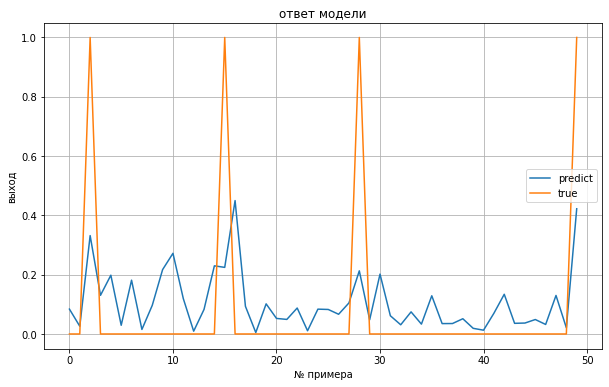

In [ ]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')                                                                        

Best Threshold=0.22149352127516678, F-Score=0.656, Precision=0.550, Recall=0.812


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1592  163]
 [  47  198]]


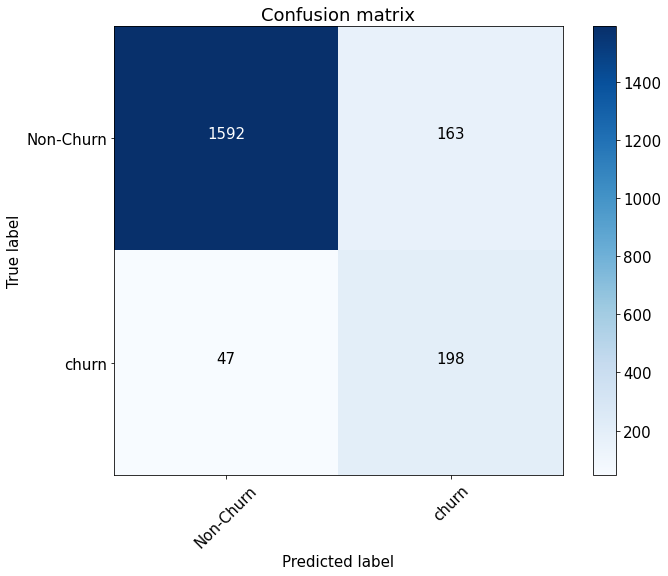

In [ ]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
roc_auc_score(y_test, preds)

0.9401732658875516

## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

## Дополнительные ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
3. http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/